In [1]:
from Utils.Solver import *

In [2]:
# Let's assume we are interested in the following stocks: AAPL, MSFT, TSLA, AMZN, GOOG
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
# Signal scores for AAPL, MSFT, TSLA, AMZN, GOOG
signal_scores = np.array([1.0, 1.5, 0.5, 0.25, 1.75])  # Example signal scores
start_date ='2021-01-15'
end_date ='2022-01-15'

# Step 1: Download historical stock data
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


## Signals 

In [3]:
import yfinance as yf
import talib as ta
import pandas as pd
import numpy as np

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')



[*********************100%***********************]  5 of 5 completed


In [4]:

import talib as ta
import pandas as pd

def calculate_rsi_signal(data, tickers, date, period=14):
    """
    Calculate the RSI for each stock in the portfolio and return a single signal score for each company.
    
    Parameters:
    - data: A DataFrame containing the 'Close' prices for each stock (tickers as columns).
    - period: The lookback period for the RSI calculation (default is 14).
    
    Returns:
    - A list of signal scores for each stock, corresponding to the tickers.
    """
    # Convert the date to a pandas datetime object for comparison
    date = pd.to_datetime(date)

    # Initialize an empty list to hold the signal scores
    signal_scores = []

    # Loop through each stock (ticker) in the data DataFrame
    for ticker in tickers:
        # Get the closing prices for the ticker
        close_prices = data['Close'][ticker]
        
        # Calculate RSI using TA-Lib (you can adjust the time period if needed)
        rsi = ta.RSI(close_prices, timeperiod=period)
        
        # Check if the date is within the available data range
        if date in rsi.index:
            # Get the RSI value for the specific date
            signal_scores.append([ticker, rsi.loc[date]])
        else:
            # Handle the case when the date is not available in the data range
            signal_scores.append([ticker, np.nan])
            

    return signal_scores

# Calculate the RSI signal scores
signal_scores = calculate_rsi_signal(data, tickers, date='2022-12-23', period=14)
print(signal_scores)

[['AAPL', np.float64(35.69464751879739)], ['MSFT', np.float64(44.140491622802536)], ['TSLA', np.float64(19.819923419876353)], ['AMZN', np.float64(38.02756082127925)], ['GOOG', np.float64(40.44856712156995)]]


In [5]:
scores = [score[1] for score in signal_scores]
# Convert to a NumPy array if needed
scores_array = np.array(scores)

print(scores_array)

[35.69464752 44.14049162 19.81992342 38.02756082 40.44856712]


     pcost       dcost       gap    pres   dres
 0: -1.2478e-01 -1.1479e+00  1e+00  0e+00  3e+00
 1: -1.2557e-01 -1.5230e-01  3e-02  5e-17  7e-02
 2: -1.2688e-01 -1.2801e-01  1e-03  1e-16  1e-03
 3: -1.2692e-01 -1.2694e-01  2e-05  1e-16  1e-05
 4: -1.2692e-01 -1.2692e-01  2e-07  1e-16  1e-07
 5: -1.2692e-01 -1.2692e-01  2e-09  7e-17  1e-09
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.2004800441463084), 'MSFT': np.float64(0.2597470655810966), 'TSLA': np.float64(0.08908236995641543), 'AMZN': np.float64(0.21685079645439062), 'GOOG': np.float64(0.23383972386178897)}
Final Portfolio Weights: [0.20048004 0.25974707 0.08908237 0.2168508  0.23383972]


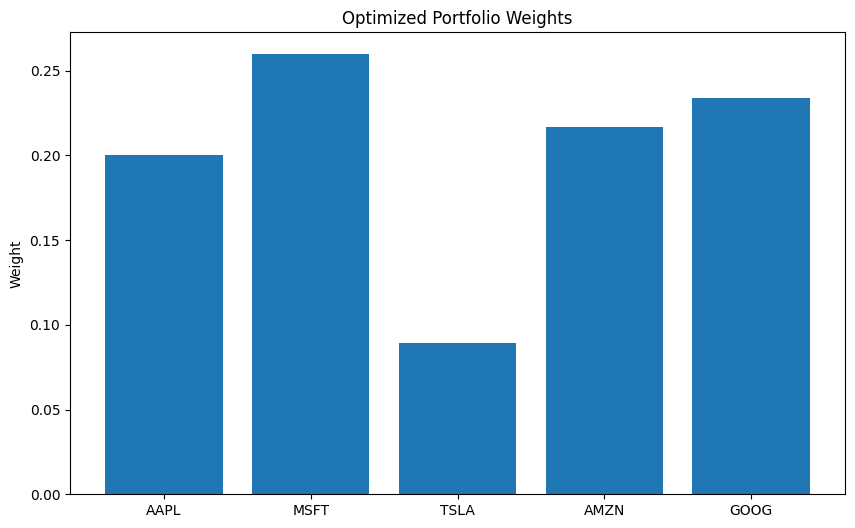

In [6]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, scores_array)
print("Final Portfolio Weights:", portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=portfolio_weights)

Total Portfolio Return: 147.66%
Annualized Portfolio Return: 147.66%


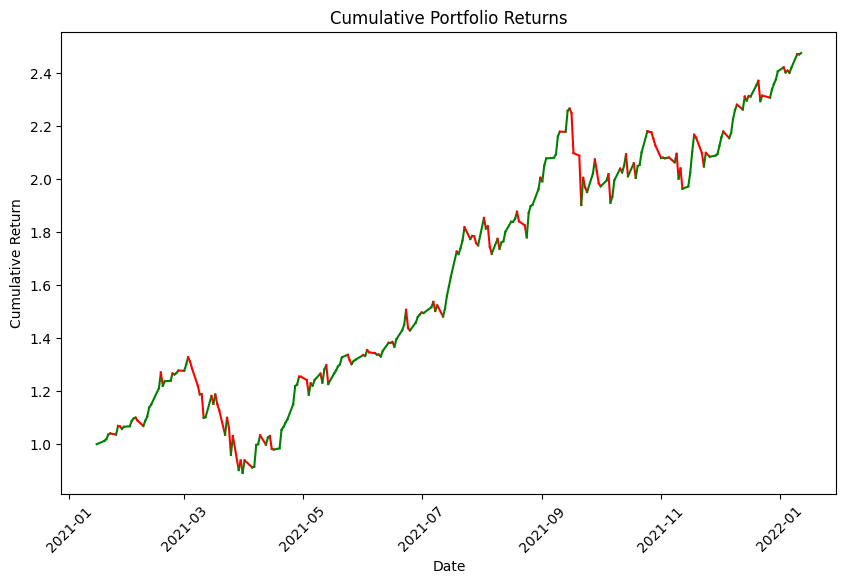

In [ ]:
# Step 2: Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, portfolio_weights)

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']

# Filter data for the specific date range
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, filtered_data)